In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [3]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\BOSTON_HOUSING.csv",encoding="euc_kr",engine="python")
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


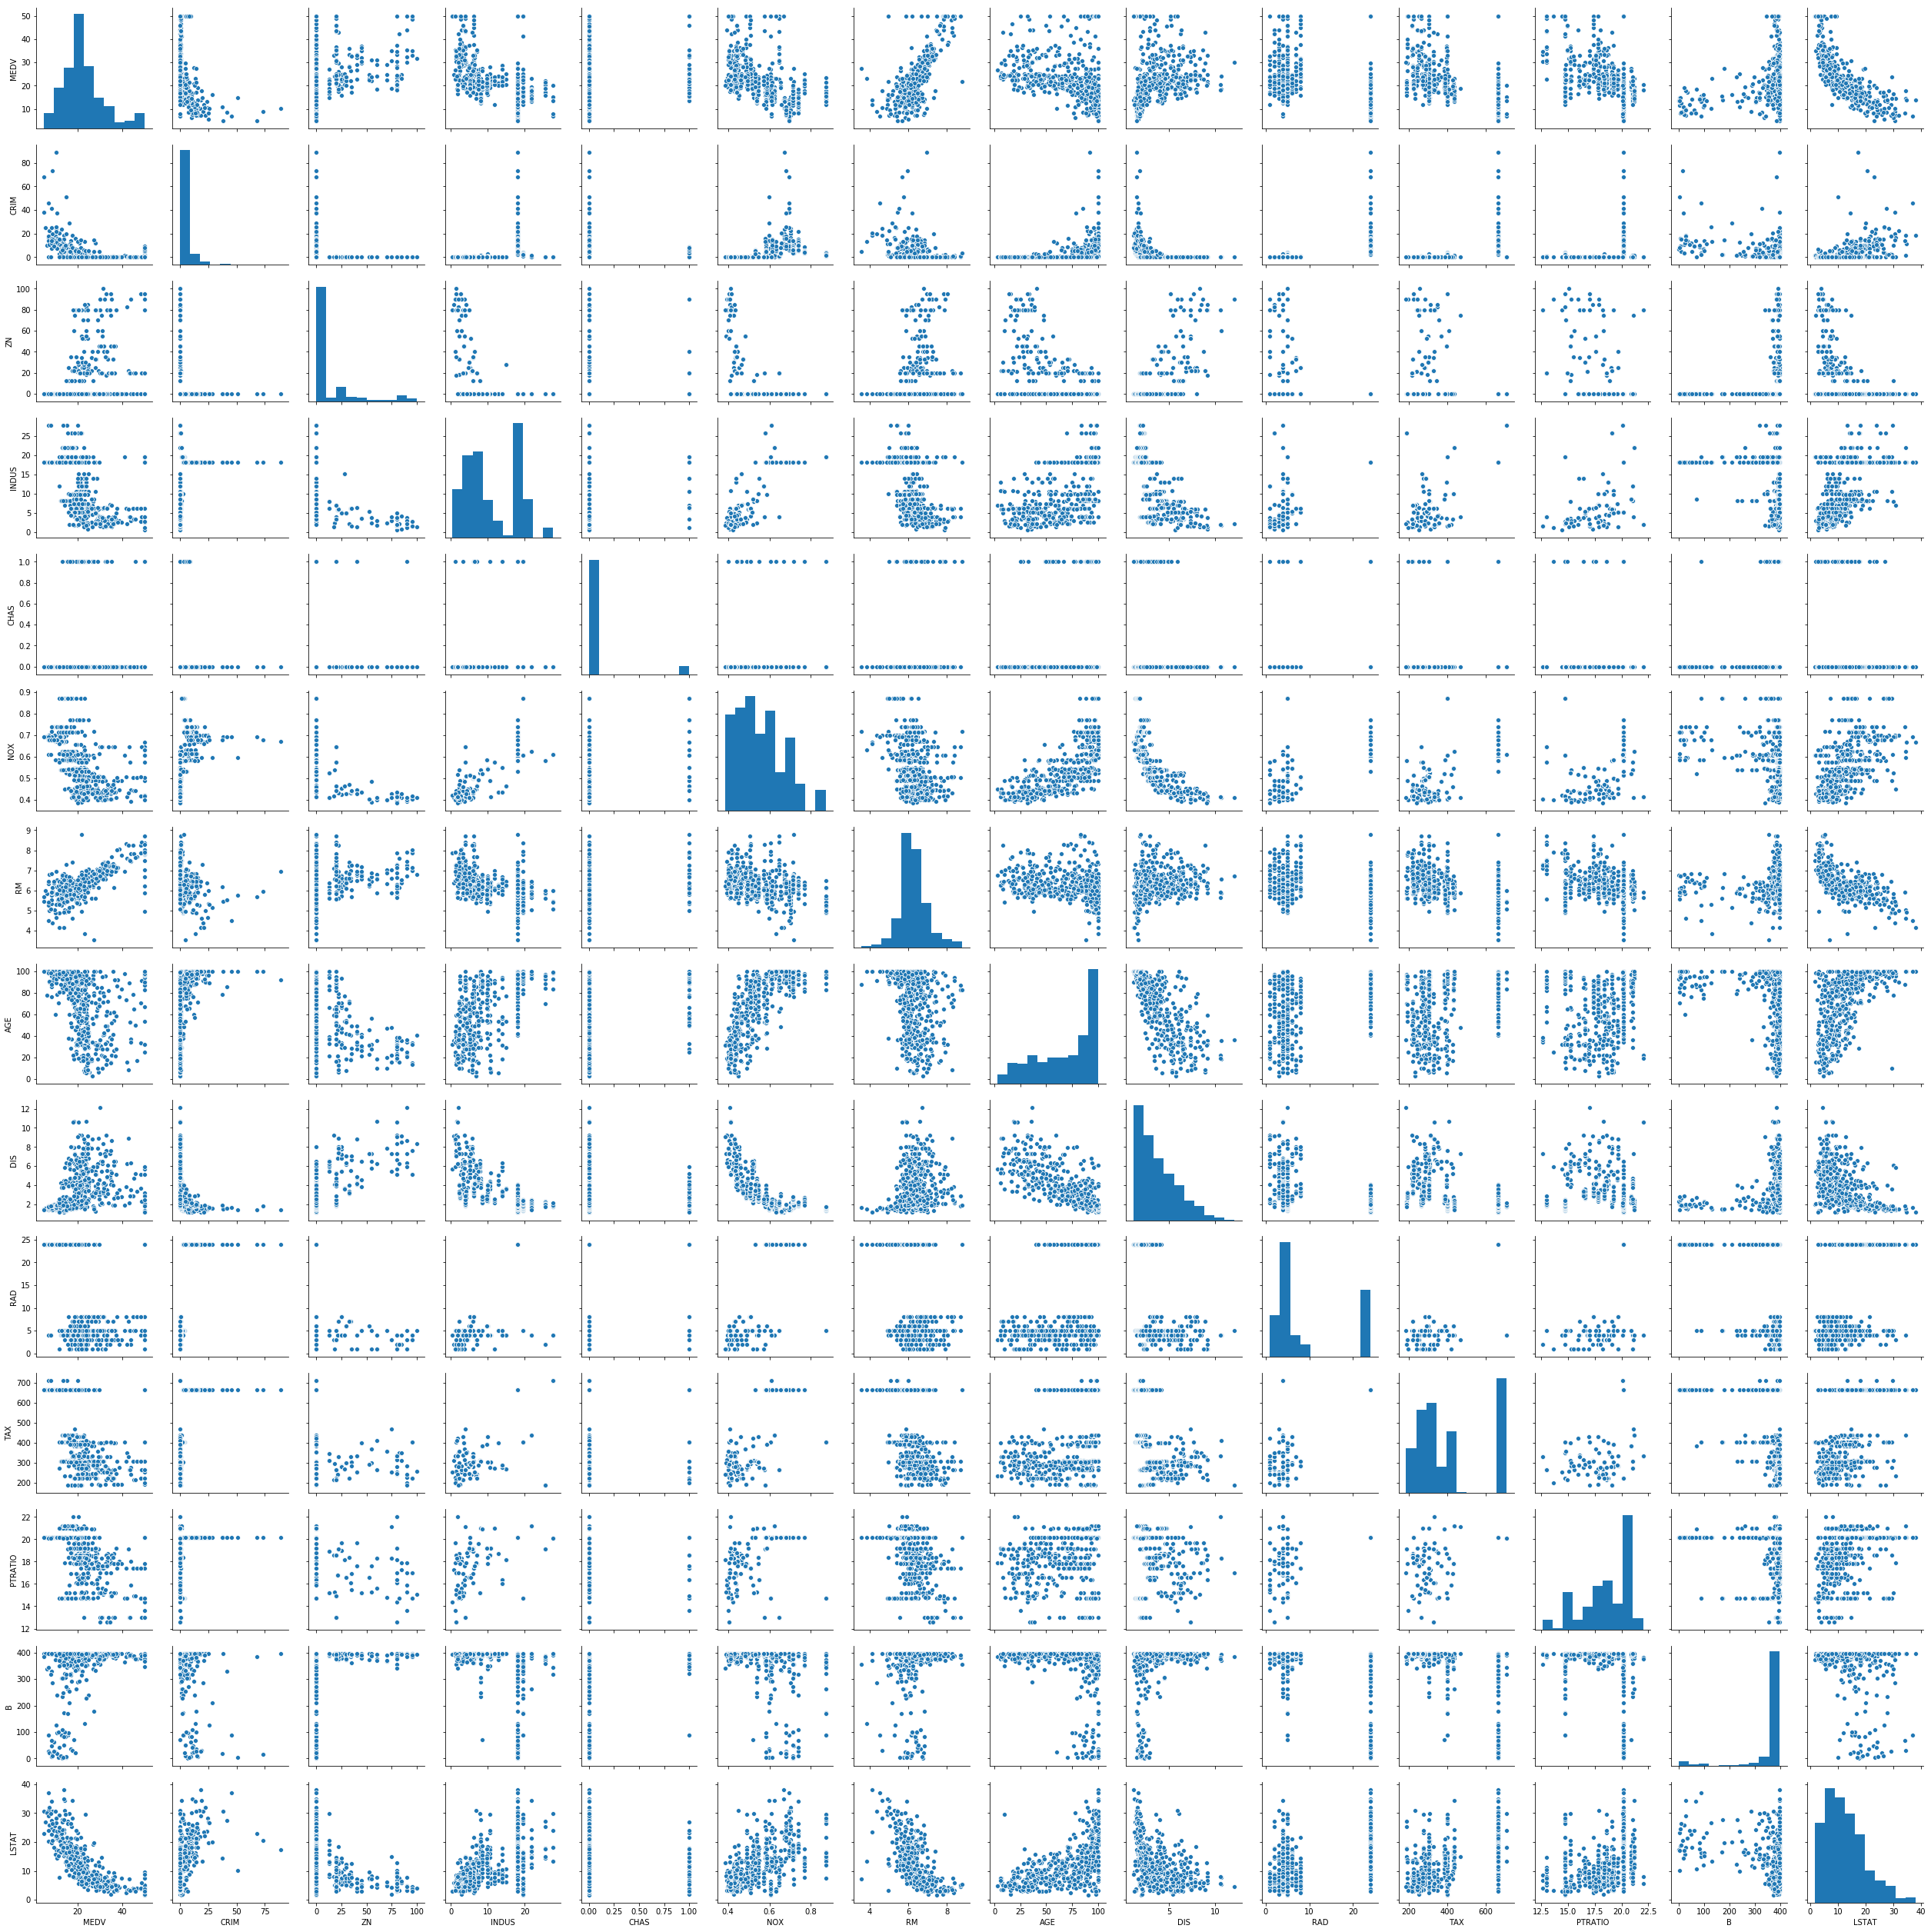

In [4]:
sns.pairplot(df_raw)

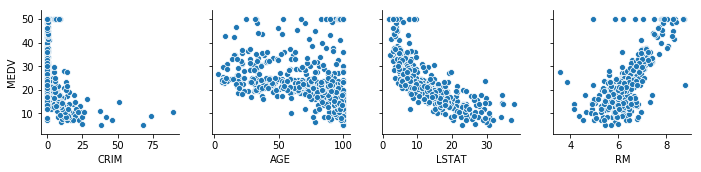

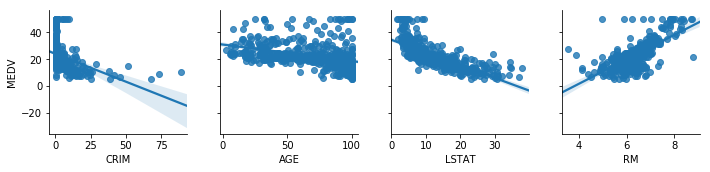

In [5]:
sns.pairplot(df_raw,y_vars="MEDV",x_vars=["CRIM","AGE","LSTAT","RM"])
sns.pairplot(df_raw,y_vars="MEDV",x_vars=["CRIM","AGE","LSTAT","RM"],kind="reg")

- 주택가격(MEDV)는 다수의 설명 변수와 선형관계를 보이고 있고, 설명변수간 선형성과 이상치 확인됨

- 다중공선성 확인, 이상치 처리 검토 

In [6]:
df_raw.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


- MEDV과 RM,LSTAT,PTRATIO 간의 높은 선형관계 확인 /
설명변수 간 선형관계 : CRIM와 다른 설명변수 간의 선형관계 확인 => 다중공선성 확인, 조치 필요

# 회귀모델 생성

In [10]:
reg_model=smf.ols(formula="MEDV~CRIM+ZN+INDUS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT",data=df_raw)

In [11]:
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 04 May 2019   Prob (F-statistic):          7.30e-134
Time:                        14:19:10   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

1. p값이 유의수준 0.05 보다 작으므로 회귀모델로서 유의
2. 설명력 : 0.736 (모델을 통하여 설명변수 EVAL을 73.6%를 설명할 수 있음)
3. 희귀계수 검정 => 절편의 유의성은 검토하지 않음. (회귀식에는 절편의 유의성 상관없이 항상 포함)
                 => INDUS,AGE의 p값을 제외한 독립변수들의 유의수준 0.05보다 작으므로 유의



In [13]:
df_raw_X=df_raw.drop("MEDV",axis=1)
df_raw_X_const=add_constant(df_raw_X)

c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
df_vif=pd.DataFrame()
df_vif["Variable"]=df_raw_X_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_raw_X_const.values,i)for i in range(df_raw_X_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(3)

,Variable,VIF
4,CHAS,1.074
12,B,1.349
1,CRIM,1.792
11,PTRATIO,1.799
6,RM,1.934
2,ZN,2.299
13,LSTAT,2.941
7,AGE,3.101
8,DIS,3.956
3,INDUS,3.992


VIF가 10이상 넘는 변수가 없으므로 다중공선성은 별도 검토하지 않는다.

In [59]:
df_raw_y=df_raw["MEDV"]
model=LinearRegression()
rfe=RFE(estimator=model,n_features_to_select=12).fit(df_raw_X,df_raw_y)
selected_cols=df_raw_X.columns[rfe.support_]
removed_cols=df_raw_X.columns[~rfe.support_]
print("Selected Variavles:{}".format(selected_cols))
print("Removed Variavles:{}".format(removed_cols))

Selected Variavles:Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Removed Variavles:Index(['AGE'], dtype='object')


- 후진제거법을 사용하여 변수 제거

In [60]:
rfe_reg_model=smf.ols(formula="MEDV~CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT+AGE",data=df_raw)
rfe_reg_result=reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sat, 04 May 2019   Prob (F-statistic):          7.30e-134
Time:                        17:10:26   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8920      5.147      7.168      0.0

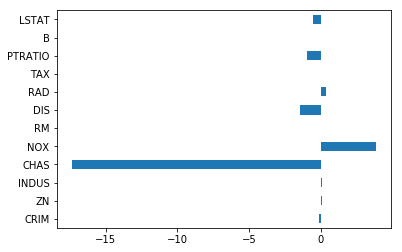

In [61]:
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:14]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

# 의사결정나무 분석

In [67]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [68]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\BOSTON_HOUSING.csv",encoding="euc_kr",engine="python")
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


In [69]:
df_raw_y=df_raw["MEDV"]
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

In [70]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152,)


In [71]:
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=0.428,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("Validation data X size : {}".format(df_validation_x.shape))
print("Validation data Y size : {}".format(df_validation_y.shape))

train data X size : (202, 13)
train data Y size : (202,)
Validation data X size : (152, 13)
Validation data Y size : (152,)


train 데이터 202건, validation 데이터 152건, test 데이터 152건

In [72]:
tree_uncustomized=DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(tree_uncustomized.score(df_validation_x,df_validation_y)))
print("Score on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set:1.000
Score on validation set:0.754
Score on test set:0.667


In [73]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [74]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

=> 모델 parameter 조정 : min_samples_leaf:입사귀 노드의 최소자료 수 변경에 따른 모델 성능

In [75]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,1.000,0.754
1,2,0.954,0.749
2,3,0.943,0.748
3,4,0.901,0.666
4,5,0.883,0.708
5,6,0.865,0.710
6,7,0.858,0.700
7,8,0.838,0.704
8,9,0.826,0.706
9,10,0.812,0.705


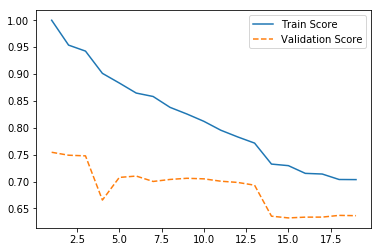

In [76]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_leaf = 12개 적절

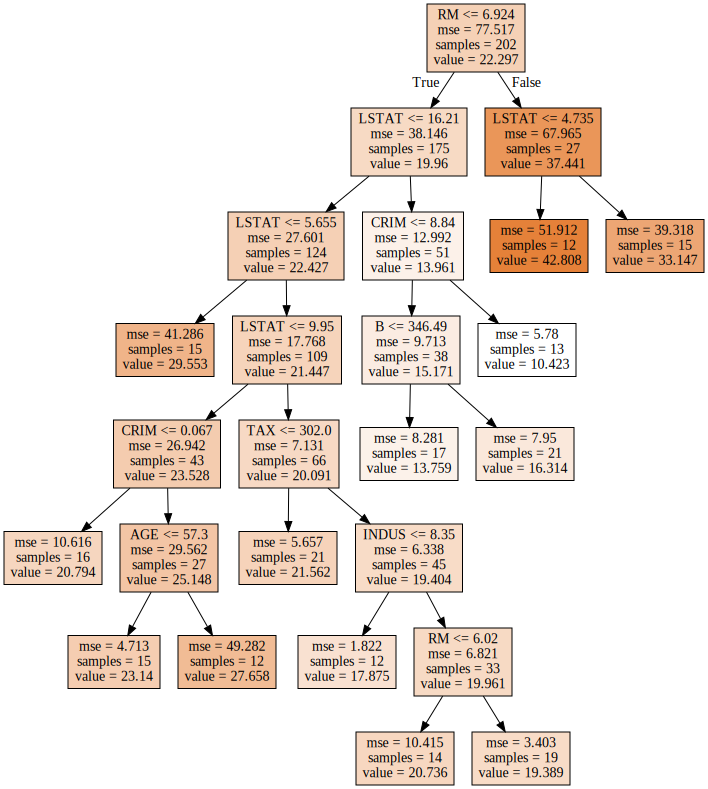

In [79]:
v_feature_names=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=12)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",
               feature_names=v_feature_names,impurity=True,filled=True)
with open("tree_leaf.dot")as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

- 분리 노드 최소 자료 수 조정 필요

In [81]:
train_score=[];validation_score=[];
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf=12,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,Validation
0,4,0.783,0.698
1,6,0.783,0.698
2,8,0.783,0.698
3,10,0.783,0.698
4,12,0.783,0.698
5,14,0.783,0.698
6,16,0.783,0.698
7,18,0.783,0.698
8,20,0.783,0.698
9,22,0.783,0.698


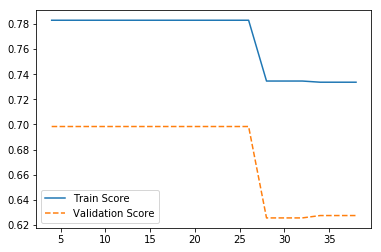

In [82]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_split =>26개가 적절

In [85]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=12,min_samples_split=26,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    validation_score.append(tree.score(df_validation_x,df_validation_y))
    
df_score_depth= pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.456,0.397
1,2,0.662,0.631
2,3,0.731,0.656
3,4,0.755,0.694
4,5,0.771,0.697
5,6,0.782,0.700
6,7,0.783,0.698
7,8,0.783,0.698
8,9,0.783,0.698
9,10,0.783,0.698


- 최대 깊이 조정 필요

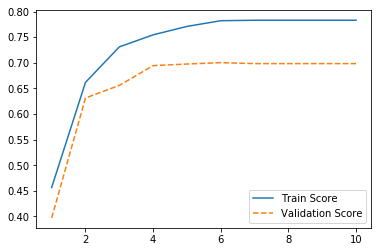

In [86]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- max_depth=4개 적절(3 모델의 성능이 유사함)

# 최종모델 선정 / 시각화

In [87]:
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=4,min_samples_split=24,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=24, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

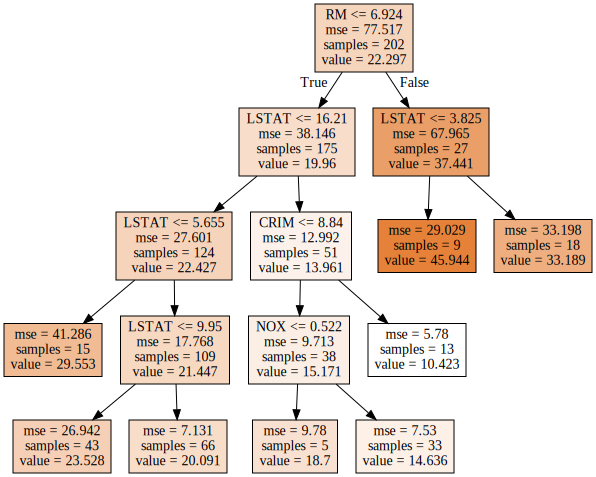

In [90]:
export_graphviz(tree_final,out_file="tree_final.dot",
                feature_names=v_feature_names,impurity =True, filled=True)

with open("tree_final.dot")as f:
    dot_graph =f.read()
display(graphviz.Source(dot_graph))

- 부모노드:최상위 노드에서 RM > 6.924 이면 해당 자료수는 27개 이고 집값(MSVD)이 증가하고 mse도 상당히 개선됨.
- 최대 깊이가 증가하면서 생성된느 잎사귀의 자료수는 감소하고 모델의 MSE 또한 지속적으로 감소하지만, 분리조건에 따라 콘크리트 강도는 상위 노드 대비 증가하거나 감소함.

In [88]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,RM,0.587
12,LSTAT,0.389
0,CRIM,0.018
4,NOX,0.006
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
6,AGE,0.000
7,DIS,0.000
8,RAD,0.000


Text(0, 0.5, '변수')

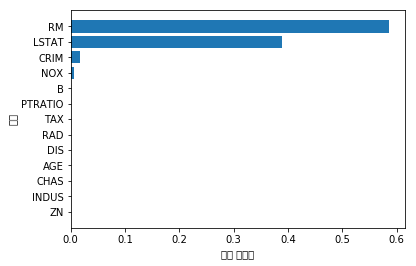

In [89]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 결론도출

In [91]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,RM,0.587
12,LSTAT,0.389
0,CRIM,0.018
4,NOX,0.006
1,ZN,0.000
2,INDUS,0.000
3,CHAS,0.000
6,AGE,0.000
7,DIS,0.000
8,RAD,0.000


Text(0, 0.5, '변수')

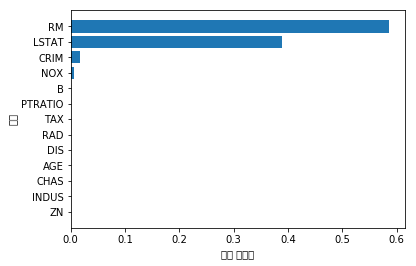

In [92]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- RM, LSTAT, CRIME, NOX 순으로 영향을 줌

# 랜덤포레스트 분석

In [93]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [94]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\BOSTON_HOUSING.csv",encoding="euc_kr",engine="python")
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


In [95]:
df_raw_y=df_raw["MEDV"]
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

In [96]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 13)
train data Y size : (354,)
test data X size : (152, 13)
test data Y size : (152,)


In [97]:
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=0.428,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("Validation data X size : {}".format(df_validation_x.shape))
print("Validation data Y size : {}".format(df_validation_y.shape))

train data X size : (202, 13)
train data Y size : (202,)
Validation data X size : (152, 13)
Validation data Y size : (152,)


train 데이터 202건, validation 데이터 152건, test 데이터 152건

In [99]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(rf_uncustomized.score(df_validation_x,df_validation_y)))

Score on training set:0.955
Score on validation set:0.849


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### 모델 parameter 조정

### n_estimators:트리의 수 변경에 따른 모델 성능

In [116]:
train_score=[];validation_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_n=pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["Validation"]=validation_score

- 모델 설명력 확인

In [117]:
df_score_n.round(3)

,n_estimators,TrainScore,Validation
0,10,0.955,0.849
1,20,0.956,0.861
2,30,0.958,0.856
3,40,0.961,0.861
4,50,0.962,0.861
5,60,0.962,0.863
6,70,0.963,0.863
7,80,0.964,0.866
8,90,0.966,0.864
9,100,0.966,0.861


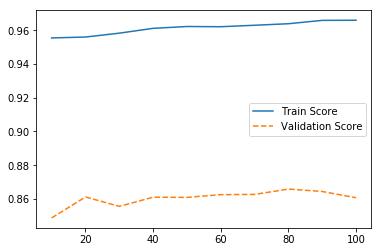

In [118]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- 트리의 수가 40개 이후로 설명력의 큰 변화를 보이지 않는다.
- 트리수에 의한 영향을 배제하고자 n_estimators = 100 지정

### min_samples_leaf : 입사귀 노드의 최소자료 수 변경에 따른 모델 성능

In [119]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

In [106]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,0.966,0.861
1,2,0.941,0.841
2,3,0.913,0.817
3,4,0.887,0.806
4,5,0.869,0.792
5,6,0.853,0.783
6,7,0.841,0.784
7,8,0.826,0.777
8,9,0.808,0.768
9,10,0.788,0.757


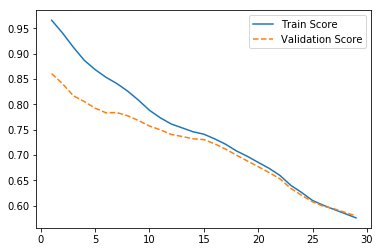

In [107]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_leaf = 27개 적절

### min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [120]:
train_score=[];validation_score=[]
para_split=[n_split*2 for n_split in range(2,51)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=27,
                              min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSamplesSPlit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score

In [121]:
df_score_split.round(3)

,MinSamplesSPlit,TrainScore,Validation
0,4,0.593,0.594
1,6,0.593,0.594
2,8,0.593,0.594
3,10,0.593,0.594
4,12,0.593,0.594
5,14,0.593,0.594
6,16,0.593,0.594
7,18,0.593,0.594
8,20,0.593,0.594
9,22,0.593,0.594


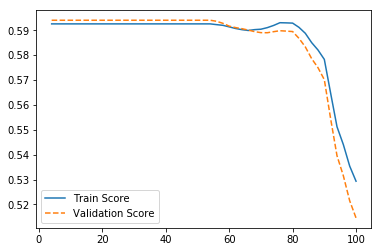

In [122]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_split = 62개 적절

### max_depth : 최대 깊이 변경에 따른 모델 성능

In [123]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=27,min_samples_split=62,
                              max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_validation_x,df_validation_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score

In [124]:
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.506,0.487
1,2,0.593,0.590
2,3,0.591,0.591
3,4,0.591,0.591
4,5,0.591,0.591
5,6,0.591,0.591
6,7,0.591,0.591
7,8,0.591,0.591
8,9,0.591,0.591
9,10,0.591,0.591


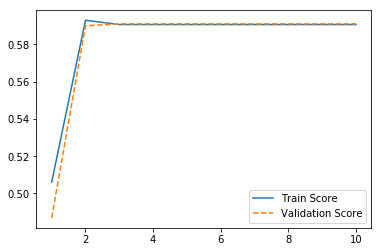

In [125]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- max_depth = 3개 적절

# 결론도출

### 최종 모델 생성

In [131]:
rf_final = RandomForestRegressor(random_state=1234,n_estimators=100,min_samples_leaf=27,min_samples_split=62,max_depth=3)
rf_final.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
rf_final

Score on training set: 0.591
Score on test set: 0.597


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=27, min_samples_split=62,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

### 최종 모델 시각화(생성되는 트리 중 3개 직접 확인)

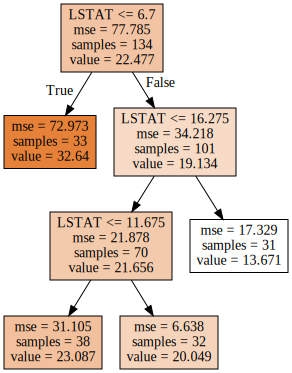

In [132]:
v_feature_names=df_train_x.columns
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_0.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

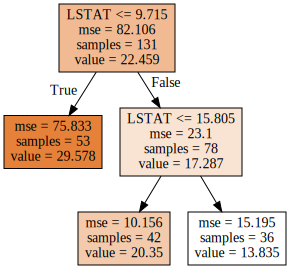

In [133]:
export_graphviz(rf_final.estimators_[1],out_file="rfr_final_1.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_1.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

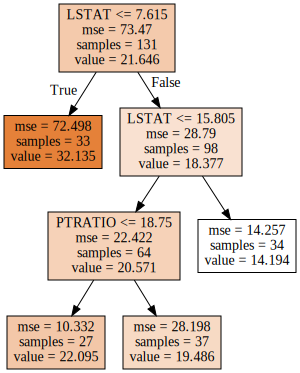

In [134]:
export_graphviz(rf_final.estimators_[10],out_file="rfr_final_10.dot",feature_names=v_feature_names,impurity=True,filled=True)
with open("rfr_final_10.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 위와 같은 트리 100개(n_extimators=100 으로 지정)를 조합하여 최종모델이 생성됨

### feature_importances_:설명변수의 중요도

In [135]:
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


,Feature,Importance
12,LSTAT,0.917
5,RM,0.080
6,AGE,0.002
10,PTRATIO,0.000
2,INDUS,0.000
8,RAD,0.000
11,B,0.000
9,TAX,0.000
0,CRIM,0.000
1,ZN,0.000


Text(0, 0.5, '변수')

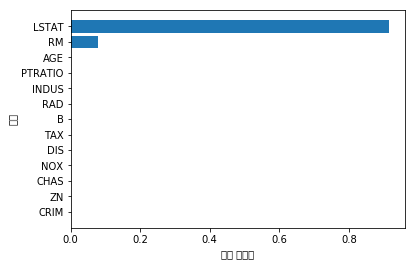

In [136]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- LSTAT, RM 변수가 중요한 요인으로 판단됨.

# 그래디언트 부스팅 분석

In [138]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
import graphviz

matplotlib.rc('font',family='Malgun Gothic')
matplotlib.rc('font',family='NanumGothic')

import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

### 모델 parameter 조절

In [137]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(gb_uncustomized.score(df_validation_x,df_validation_y)))

Score on training set:0.988
Score on validation set:0.876


- estimators : 트리의 수 변경에 따른 모델성능

In [139]:
train_score=[];validation_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators,)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_n=pd.DataFrame()
df_score_n["Estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["Validation"]=validation_score

In [140]:
df_score_n.round(3)

,Estimators,TrainScore,Validation
0,10,0.769,0.694
1,20,0.907,0.824
2,30,0.943,0.851
3,40,0.961,0.865
4,50,0.970,0.870
5,60,0.976,0.873
6,70,0.981,0.876
7,80,0.984,0.876
8,90,0.986,0.876
9,100,0.988,0.876


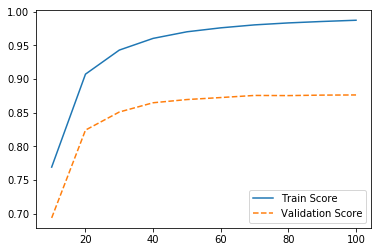

In [141]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- n_estimatoes =20개 적절

## min_samples_leaf : 입사귀 노드의 자료 수 지정

In [149]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,60)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,
                              min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

In [150]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,0.907,0.824
1,2,0.901,0.814
2,3,0.897,0.804
3,4,0.889,0.805
4,5,0.877,0.806
5,6,0.863,0.789
6,7,0.859,0.772
7,8,0.853,0.777
8,9,0.846,0.782
9,10,0.841,0.776


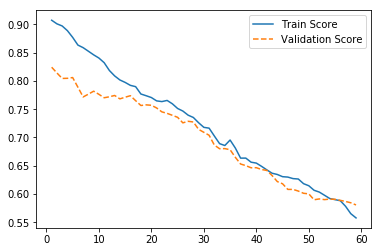

In [151]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_leaf=41개 적절

## min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [157]:
train_score=[];validation_score=[]
para_split=[n_split*2 for n_split in range(2,60)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=41,
                              min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSampleSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score

In [158]:
df_score_split.round(3)

,MinSampleSplit,TrainScore,Validation
0,4,0.649,0.643
1,6,0.649,0.643
2,8,0.649,0.643
3,10,0.649,0.643
4,12,0.649,0.643
5,14,0.649,0.643
6,16,0.649,0.643
7,18,0.649,0.643
8,20,0.649,0.643
9,22,0.649,0.643


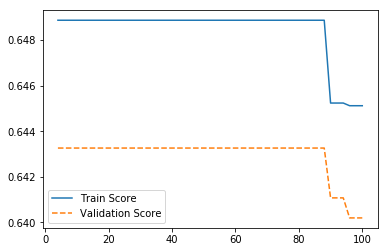

In [156]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_split = 104개 적절

## max_depth : 최대 깊이 변경에 따른 설명력 변화

In [161]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=41,min_samples_split=104,
                              max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score

In [162]:
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.592,0.594
1,2,0.634,0.632
2,3,0.639,0.639
3,4,0.639,0.639
4,5,0.639,0.639
5,6,0.639,0.639
6,7,0.639,0.639
7,8,0.639,0.639
8,9,0.639,0.639
9,10,0.639,0.639


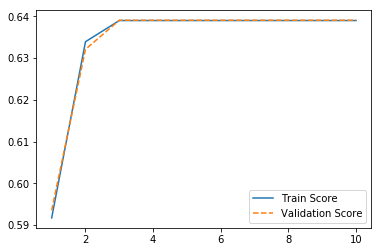

In [163]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- max_depth = 3개 적절

## learning_rate: 학습률 변경 시 모델의 설명력 변화

In [166]:
train_score=[];validation_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=41,min_samples_split=104,
                              max_depth=4,learning_rate =v_learning_rate )
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_lr=pd.DataFrame()
df_score_lr["Learning_rate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["Validation"]=validation_score

In [167]:
df_score_lr.round(3)

,Learning_rate,TrainScore,Validation
0,0.1,0.639,0.639
1,0.2,0.717,0.677
2,0.3,0.769,0.690
3,0.4,0.789,0.693
4,0.5,0.794,0.668
5,0.6,0.806,0.665
6,0.7,0.817,0.670
7,0.8,0.836,0.642
8,0.9,0.841,0.631


# 결론도출

## 최종모델 생성

In [168]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=41,min_samples_split=104,max_depth=3)
gb_final.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.639
Score on test set: 0.659


### 설명변수의 중요도

In [169]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
12,LSTAT,0.715
5,RM,0.237
9,TAX,0.017
2,INDUS,0.014
10,PTRATIO,0.010
7,DIS,0.007
0,CRIM,0.000
1,ZN,0.000
3,CHAS,0.000
4,NOX,0.000


Text(0, 0.5, '변수')

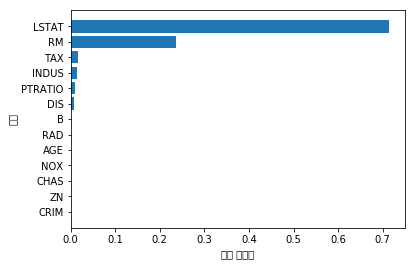

In [170]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
- LSTAT, RM, TAX, INDUS, PTRATIO, DIS 순으로 유의한 변수로 확인됨